# Analyzing Pricing and Discount Strategies

### Problem Definement
Tìm hiểu một số yếu tố ảnh hưởng đến chiến lược định giá chiết khấu (Discount Pricing Stratety) bao gồm phân khúc giá và thương hiệu. Bài phân tích nhằm cung cấp insights về chiến lược định giá chiết khấu ở các thương hiệu khác nhau.
### Dataset Overview
  The dataset contains detailed information about various mobile phones with 10 columns:
- **Product Name**: The name or model of the mobile phone
- **Actual Price**: The original price of the mobile before any discounts are applied
- **Discount Price**: The current price of the mobile after discounts
- **Stars:** The average star rating given by users
- **Rating**: The number of users who have rated the product
- **Reviews**: The number of written reviews provided by customers
- **RAM (GB)**: The amount of RAM (in gigabytes) the device has
- **Storage (GB)**: The internal storage capacity of the device
- **Display Size (inch)**: The size of the mobile’s display, measured in inches
- **Camera**: The specifications of the cameras


### Objectives
- **Identify patterns**: Xác định % chiết khấu đối với các sản phẩm ở phân khúc giá khác nhau
- **Investigate Brand Performance**: Tìm hiểu mức các chiết khấu được Brands sử dụng nhằm mục đích có được cái nhìn tổng quan chiến lược định giá
- **Explore Price Segments**: kiểm tra phân khúc giá ảnh hưởng như thế nào đến chiến lược định giá và chiết khấu
- **Provide key insights**: cung cấp actionable insights, đánh giá Pricing and Discount Strategies ảnh như thế nào đến hành vi mua hàng.

*(source: Kaggle)*


# 1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express  as px
import warnings
warnings.filterwarnings("ignore")

# 2. Loading Dataset





In [ ]:
#Connect colab to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Mobiles_Dataset.csv')


# 3. Data Exploration

In [ ]:
df.head()

,Product Name,Actual price,Discount price,Stars,Rating,Reviews,RAM (GB),Storage (GB),Display Size (inch),Camera,Description,Link
0,"Apple iPhone 15 (Green, 128 GB)","₹79,600","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://www.flipkart.com/apple-iphone-15-green...
1,"Apple iPhone 15 (Blue, 128 GB)","₹79,600","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://www.flipkart.com/apple-iphone-15-blue-...
2,"Apple iPhone 15 (Black, 128 GB)","₹79,600","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://www.flipkart.com/apple-iphone-15-black...
3,"OnePlus N20 SE (JADE WAVE, 128 GB)","₹19,999","₹11,489",4.0,"1,005 Ratings",41 Reviews,4,128,6.56,50MP,4 GB RAM | 128 GB ROM16.66 cm (6.56 inch) Disp...,https://www.flipkart.com/oneplus-n20-se-jade-w...
4,"OnePlus N20 SE (BLUE OASIS, 64 GB)","₹16,999","₹12,999",4.0,"1,005 Ratings",41 Reviews,4,64,6.56,50MP,4 GB RAM | 64 GB ROM16.66 cm (6.56 inch) Displ...,https://www.flipkart.com/oneplus-n20-se-blue-o...


In [ ]:
#check summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         984 non-null    object 
 1   Actual price         984 non-null    object 
 2   Discount price       984 non-null    object 
 3   Stars                984 non-null    float64
 4   Rating               984 non-null    object 
 5   Reviews              984 non-null    object 
 6   RAM (GB)             984 non-null    object 
 7   Storage (GB)         984 non-null    object 
 8   Display Size (inch)  984 non-null    float64
 9   Camera               908 non-null    object 
 10  Description          984 non-null    object 
 11  Link                 984 non-null    object 
dtypes: float64(2), object(10)
memory usage: 92.4+ KB


In [ ]:
# find unique values for each column
columns = df.columns
for col in columns:
  print(f"{col}: {len(df[col].unique())}")

Product Name: 657
Actual price: 133
Discount price: 326
Stars: 15
Rating: 358
Reviews: 278
RAM (GB): 10
Storage (GB): 12
Display Size (inch): 41
Camera: 55
Description: 460
Link: 984


Find duplicated rows (removing "Link" column before check for duplicated rows)

In [ ]:
#drop 'Link' column
df.drop('Link', axis=1, inplace=True)

#check duplicated rows
duplicated_rows = df[df.duplicated()]
duplicated_rows

,Product Name,Actual price,Discount price,Stars,Rating,Reviews,RAM (GB),Storage (GB),Display Size (inch),Camera,Description
13,"Motorola G85 5G (Urban Grey, 128 GB)","₹20,999","₹17,999",4.5,"9,300 Ratings",537 Reviews,8,128,6.67,50MP + 8MP,8 GB RAM | 128 GB ROM16.94 cm (6.67 inch) Full...
20,"OnePlus 12 (Silky Black, 512 GB)","₹69,999","₹59,629",4.6,881 Ratings,80 Reviews,16,512,6.82,64MP,16 GB RAM | 512 GB ROM17.32 cm (6.82 inch) Dis...
24,"realme 12 Pro+ 5G (Navigator Beige, 256 GB)","₹35,999","₹31,999",4.4,"17,356 Ratings","2,216 Reviews",8,256,6.70,50MP + 8MP,8 GB RAM | 256 GB ROM17.02 cm (6.7 inch) Full ...
32,"Google Pixel 7 (Obsidian, 128 GB)","₹59,999","₹37,999",4.3,"15,052 Ratings","1,784 Reviews",8,128,6.30,50MP + 12MP,8 GB RAM | 128 GB ROM16.0 cm (6.3 inch) Full H...
43,"POCO X6 5G (Snowstorm White, 256 GB)","₹24,999","₹18,999",4.2,"12,632 Ratings","1,510 Reviews",8,256,6.67,64MP + 8MP,8 GB RAM | 256 GB ROM16.94 cm (6.67 inch) Disp...
...,...,...,...,...,...,...,...,...,...,...,...
956,"vivo X70 Pro+ (Enigma Black, 256 GB)","₹84,990","₹48,999",4.5,563 Ratings,116 Reviews,12,256,6.78,50MP + 48MP,12 GB RAM | 256 GB ROM17.22 cm (6.78 inch) WQH...
963,"Apple iPhone 13 (Blue, 256 GB)","₹69,600","₹59,999",4.6,"2,83,227 Ratings","13,690 Reviews",NIL,256,6.10,12MP + 12MP,256 GB ROM15.49 cm (6.1 inch) Super Retina XDR...
972,Kechaoda K33,"₹1,412","₹1,064",4.0,"9,879 Ratings",597 Reviews,NIL,NIL,1.40,3MP + 0MP,32 MB RAM | 32 MB ROM | Expandable Upto 16 GB3...
979,Kechaoda A27,"₹1,499",₹967,4.0,"11,022 Ratings",693 Reviews,NIL,NIL,0.66,0MP | 0MP,32 MB RAM | 32 MB ROM | Expandable Upto 16 GB1...


In [ ]:
#drop duplicates
df = df.drop_duplicates()

In [ ]:
#summary statistics
df.describe()

,Stars,Display Size (inch)
count,837.000000,837.000000
mean,4.252569,6.086841
std,0.198641,1.530607
min,3.400000,0.660000
25%,4.200000,6.500000
50%,4.200000,6.670000
75%,4.400000,6.720000
max,5.000000,7.820000


# 4. Data Wrangling

## 4.1 Handling Missing value

In [ ]:
#check for null values
df.isnull().sum()

,0
Product Name,0
Actual price,0
Discount price,0
Stars,0
Rating,0
Reviews,0
RAM (GB),0
Storage (GB),0
Display Size (inch),0
Camera,64


Replace 6 null with "No camera"

In [ ]:
#replace NaN with "No Camera"
df['Camera'].replace(np.NaN, 'No Camera', inplace=True)

#check null values gain
df['Camera'].isnull().sum()

0

Xử lí giá trị NIL ở cột **Actual price**

In [ ]:
#check how many NIL value in Actual price column
df[df['Actual price']== "NIL"].shape[0]

43


 Thay thế NIL values bằng giá chiết khấu có thể là một phương án hiệu quả thay vì xóa hết tất cả hàng chứa giá trị NIL

In [ ]:
#replace 'NIL' with np.nan
df['Actual price'].replace('NIL', np.nan, inplace=True)

#replace null with values of Discount price
df['Actual price'] = df['Actual price'].fillna(df['Discount price'])

#Check null value for the column again
print(f"{df[df['Actual price'].isnull()].shape[0]} Null")

0 Null


Check for rows with values of empty string or string with space characters in **Discount price**






In [ ]:
#identify
df[df['Actual price'].str.strip() == '']

,Product Name,Actual price,Discount price,Stars,Rating,Reviews,RAM (GB),Storage (GB),Display Size (inch),Camera,Description
400,LAVA Yuva 3 with Dual Sim|5000 mAh Battery|13M...,,,4.1,203 Ratings,12 Reviews,4,64,6.50,13MP,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...
538,itel it5330 | 2.8 inch Big Display | 1900 mAh ...,,,4.0,"2,346 Ratings",124 Reviews,NIL,NIL,2.80,8MP + 0MP,32 MB RAM | 32 MB ROM | Expandable Upto 32 GB7...
897,"REDMI Note 13 5G (Stealth Black, 128 GB)",,,4.2,"10,801 Ratings",650 Reviews,6,128,6.67,108MP,6 GB RAM | 128 GB ROM16.94 cm (6.67 inch) Full...
898,"REDMI Note 13 5G (Stealth Black, 256 GB)",,,4.1,"2,107 Ratings",130 Reviews,12,256,6.67,108MP,12 GB RAM | 256 GB ROM16.94 cm (6.67 inch) Dis...


In [ ]:
#keep dataframe except these rows above
df = df[df['Actual price'].str.strip() != '']

## 4.2 Data Formatting


 **Convert object datatype to numeric**

  **Price Columns:**
*   Actual price
*   Discount price


  **Feedback Columns**
*   Rating
*   Reviews


  **Specifications Columns**
*   RAM (GB)
*   Storage (GB)





In [ ]:
df.head(5)

,Product Name,Actual price,Discount price,Stars,Rating,Reviews,RAM (GB),Storage (GB),Display Size (inch),Camera,Description
0,"Apple iPhone 15 (Green, 128 GB)","₹79,600","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...
1,"Apple iPhone 15 (Blue, 128 GB)","₹79,600","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...
2,"Apple iPhone 15 (Black, 128 GB)","₹79,600","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...
3,"OnePlus N20 SE (JADE WAVE, 128 GB)","₹19,999","₹11,489",4.0,"1,005 Ratings",41 Reviews,4,128,6.56,50MP,4 GB RAM | 128 GB ROM16.66 cm (6.56 inch) Disp...
4,"OnePlus N20 SE (BLUE OASIS, 64 GB)","₹16,999","₹12,999",4.0,"1,005 Ratings",41 Reviews,4,64,6.56,50MP,4 GB RAM | 64 GB ROM16.66 cm (6.56 inch) Displ...


### 4.2.1 Handling Price Columns: Actual price | Discount price

In [ ]:
#delete currency symbol and comma
df['Actual price'] = df['Actual price'].str.replace("₹", "").str.replace(",", "")
df['Discount price'] = df['Discount price'].str.replace("₹", "").str.replace(",", "")

#convert to numeric
df['Actual price'] = pd.to_numeric(df['Actual price'], errors='coerce') #erros is set to 'Coerce' means invalid entries will be returned 'NaN'
df['Discount price'] = pd.to_numeric(df['Discount price'], errors='coerce') #erros is set to 'Coerce' means invalid entries will be returned 'NaN'

In [ ]:
#Create new feature 'Discount percentage'
df['Discount percentage'] = ((df['Actual price'] - df['Discount price']) / df['Actual price']) * 100

#check null for this column again
df_null_discount_pct = df[df['Discount percentage'].isnull()]
df_null_discount_pct

,Product Name,Actual price,Discount price,Stars,Rating,Reviews,RAM (GB),Storage (GB),Display Size (inch),Camera,Description,Discount percentage


### 4.2.2 Handling Feedback Columns: Rating | Reviews

In [ ]:
#clean and take necessary data
df['Rating'] = df['Rating'].str.replace(",", '').str.split(" ").str[0]
df['Reviews'] = df['Reviews'].str.replace(',','').str.split(" ").str[0]

#Convert to numeric
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')



### 4.2.3 Handling Specifications Columns: RAM(GB) | Storage (GB)

In [ ]:
#replace 'NIL' with NaN
df['RAM (GB)'].replace("NIL", np.nan, inplace=True)
df['Storage (GB)'].replace("NIL", np.nan, inplace=True)

#Convert to numeric
df['RAM (GB)'] = pd.to_numeric(df['RAM (GB)'], errors='coerce')
df['Storage (GB)'] = pd.to_numeric(df['Storage (GB)'], errors='coerce')

#replace null with 0
df['RAM (GB)'].replace(np.nan, 0, inplace=True)
df['Storage (GB)'].replace(np.nan, 0, inplace=True)

In [ ]:
#check for unique values at 'RAM (GB)'
df['RAM (GB)'].value_counts()

,count
RAM (GB),
8.0,311
4.0,148
0.0,127
12.0,111
6.0,104
3.0,12
16.0,11
2.0,6
32.0,2


In [ ]:
#Drop row contains value of 46875
index_typo = df[df['RAM (GB)'] == 46875.0].index
df.drop(index=index_typo, inplace=True)

#check
df['RAM (GB)'].value_counts()


,count
RAM (GB),
8.0,311
4.0,148
0.0,127
12.0,111
6.0,104
3.0,12
16.0,11
2.0,6
32.0,2


In [ ]:
#arrange columns order
new_order = [
    'Product Name', 'Actual price', 'Discount price',
    'Discount percentage', 'Stars', 'Rating', 'Reviews',
    'RAM (GB)', 'Storage (GB)', 'Display Size (inch)', 'Camera',
    'Description'
]
df = df[new_order]
df.head(5)

,Product Name,Actual price,Discount price,Discount percentage,Stars,Rating,Reviews,RAM (GB),Storage (GB),Display Size (inch),Camera,Description
0,"Apple iPhone 15 (Green, 128 GB)",79600,65999,17.086683,4.6,44793,2402,0.0,128.0,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...
1,"Apple iPhone 15 (Blue, 128 GB)",79600,65999,17.086683,4.6,44793,2402,0.0,128.0,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...
2,"Apple iPhone 15 (Black, 128 GB)",79600,65999,17.086683,4.6,44793,2402,0.0,128.0,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...
3,"OnePlus N20 SE (JADE WAVE, 128 GB)",19999,11489,42.552128,4.0,1005,41,4.0,128.0,6.56,50MP,4 GB RAM | 128 GB ROM16.66 cm (6.56 inch) Disp...
4,"OnePlus N20 SE (BLUE OASIS, 64 GB)",16999,12999,23.530796,4.0,1005,41,4.0,64.0,6.56,50MP,4 GB RAM | 64 GB ROM16.66 cm (6.56 inch) Displ...


## 4.3 Outlier Detection and Handling

Kiểm tra và sử lí outliers ở các cột:
- Actual price
- Discount price
- Stars
- Rating
- Reviews
- Display Size (inch)

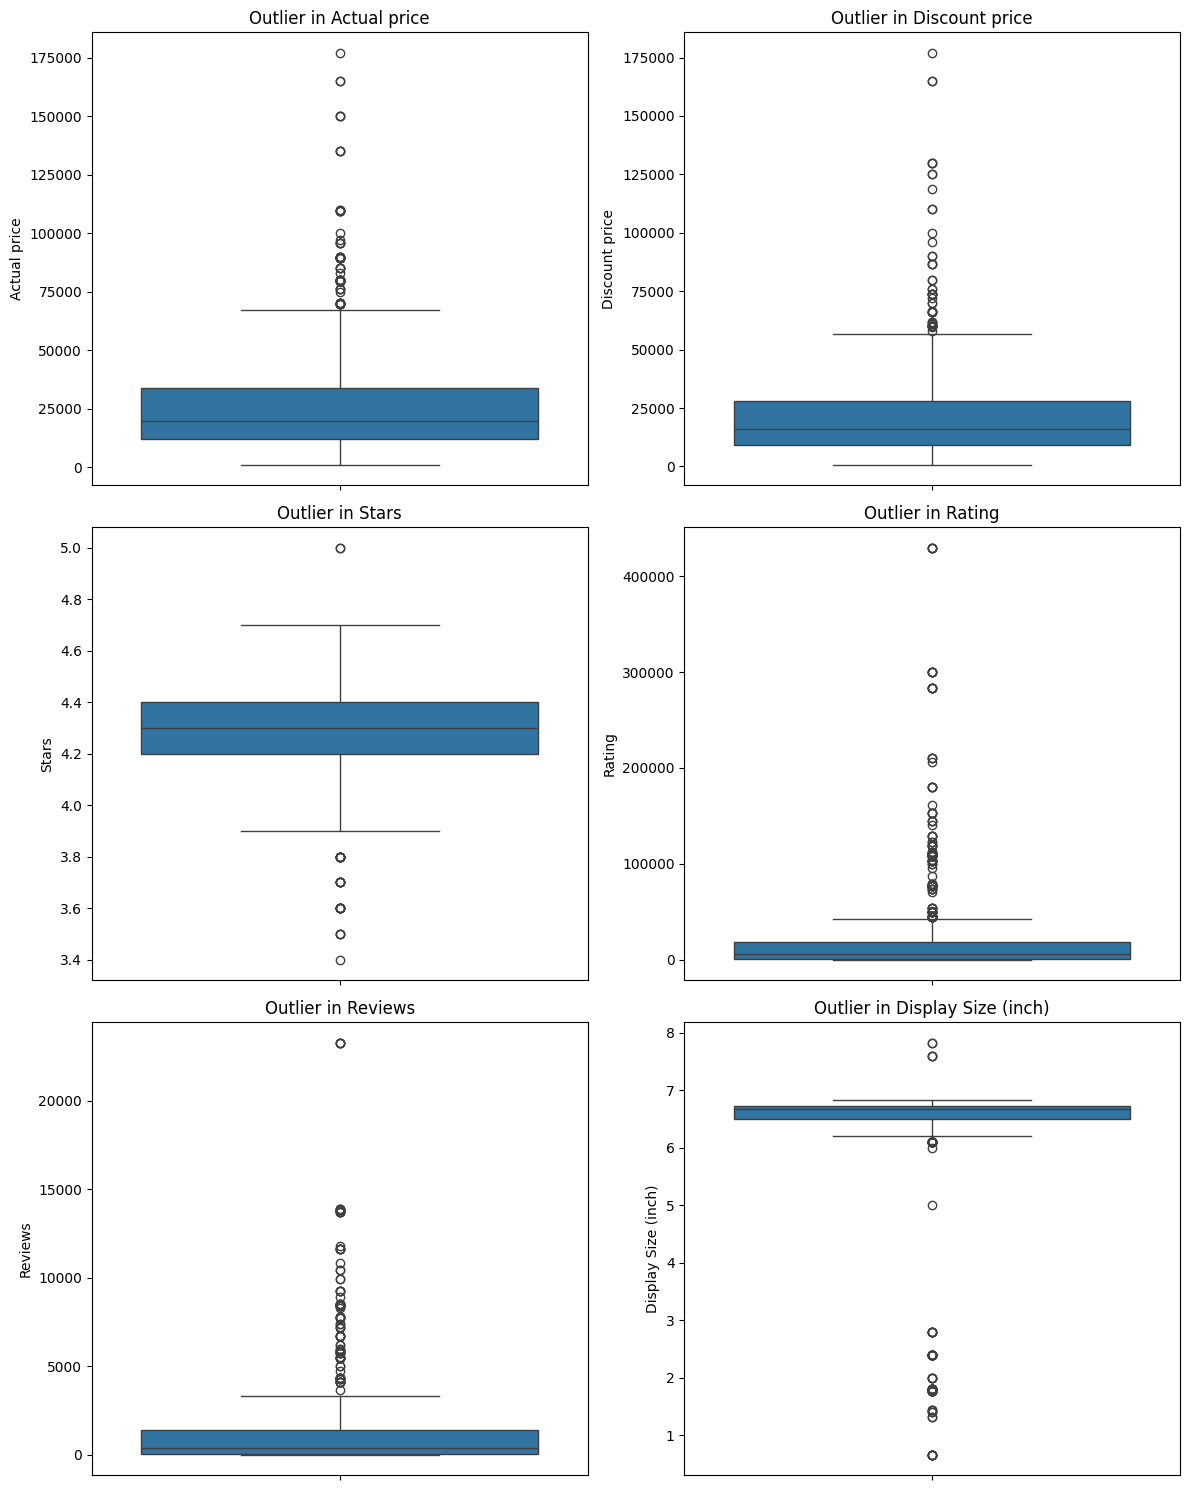

In [ ]:
#using Boxplot to determine outliers
def draw_boxplot(data, numeric_cols):
  cols = len(numeric_cols)
  rows = (cols + 1) // 2 # number of rows needed

  fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(12, rows*5))
  axes = axes.flatten()
  for i, col in enumerate(numeric_cols):
    sns.boxplot(y = data[col], ax=axes[i])
    axes[i].set_title(f'Outlier in {col}')

  #remove leftover subplots
  for k in range(i+1, len(axes)):
    fig.delaxes(axes[k])

  plt.tight_layout()
  plt.show()

col_list = ['Actual price', 'Discount price', 'Stars', 'Rating', 'Reviews', 'Display Size (inch)']
draw_boxplot(df, col_list)

Dựa vào bối cảnh được cung cấp từ dataset, chúng ta thấy rằng các continuous numerical variables bao gồm Price, Rating, Reviews, Stars, Display Size có các giá trị outliers. Có thể thấy rằng, thị trường mobile phones có rất nhiều phân khúc với mức giá khác nhau và những phân khúc cao cấp (high-end) thông thường sẽ có giá bán cao, đối với những khách hàng cao cấp có khả năng đáp ứng mức giá này thường sẽ để lại Star và Rating, Reviews tốt cho sản phẩm đó. Vì vậy outliers ở các columns như Reviews, Rating, Price sẽ cung cấp insights cho chúng ta về hành vi khách hàng. Bên cạnh đó, các sản phẩm có kích thước màn hình rất lớn hoặc rất nhỏ có xu hướng được định giá khác biệt (ví dụ: một dòng sản phẩm cao cấp với màn hình lớn thường có mức chiết khấu thấp hơn). Vì vậy chỉ cần xử lí Outliers ở cột:
- Stars: Có mối quan hệ không rõ ràng về chiến lược định giá chiết khấu


In [ ]:
#calculate IQR
Q1 = df['Stars'].quantile(0.25)
Q3 = df['Stars'].quantile(0.75)
IQR = Q3 - Q1

#calculate the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Stars']< lower_bound) | (df['Stars'] > upper_bound)]
outliers.shape

(30, 12)

In [ ]:
#Drop outliers
index_outliers = outliers.index
df.drop(index=index_outliers, inplace=True)

In [ ]:
#check
df.shape

(802, 12)

# 5. Exploratory Data Analysis

**Check distribution for all numerical columns**

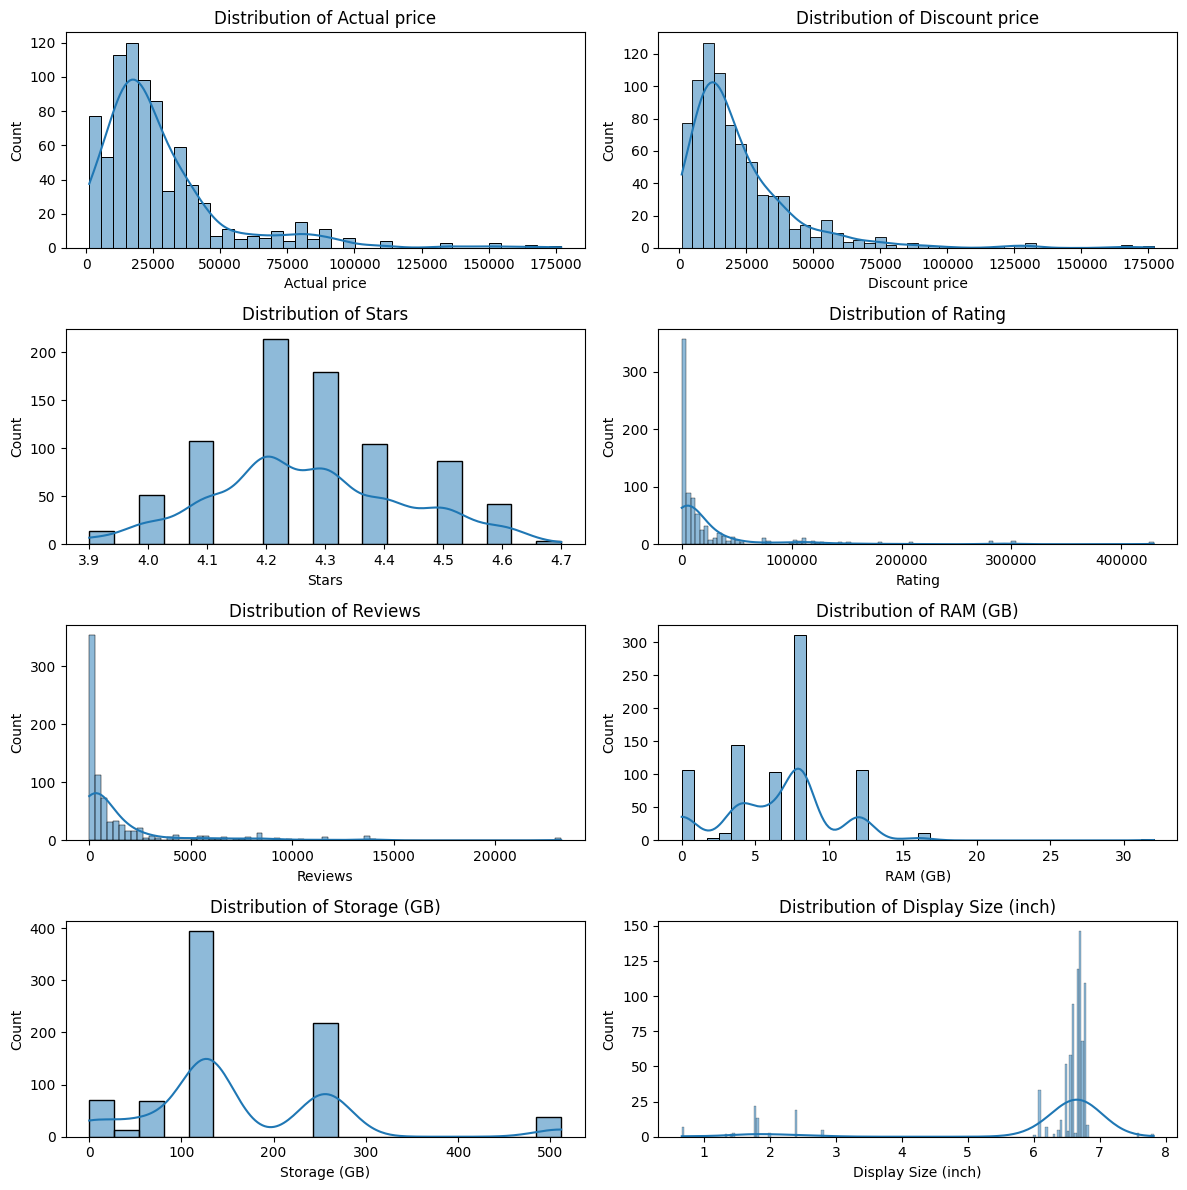

In [ ]:
#function to plot distribution of numerical columms
def draw_distribution(data, cols_list):
  cols = 2
  rows = (len(cols_list) + 1) // cols

  fig, axes = plt.subplots(rows, cols, figsize=(12,12))
  axes = axes.flatten()

  for i, col in enumerate(cols_list):
    sns.histplot(data, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

  #remove leftover subplots
  for k in range(i+1, len(axes)):
    fig.delaxes(axes[k])

  plt.tight_layout()
  plt.show()

numerical_cols = ['Actual price', 'Discount price', 'Stars', 'Rating', 'Reviews', 'RAM (GB)', 'Storage (GB)', 'Display Size (inch)']
draw_distribution(df, numerical_cols)

Summary the information of distribution plots above:
- Actual price: Sự phân bổ lệch phải cho thấy phần lớn điện thoại có 50.000 và một ít model điện thoại có giá cao.
- Discount price: Sự phân bổ lệch phải cho thấy phần lớn điện thoại có giá chiết khấu < 50.000
- Stars: Phân phối khá đều và số stars được phân bổ nhiều nhất ở giá trị 4.2 cho thấy feedback có của customers có dấu hiệu tích cực
- Rating: Phân bố lệch phải cho thấy rất nhiều sản phẩm có số lượng rating thấp
- Reviews: Phân bố lệch phải cho thấy rất nhiều sản phẩm có số lượng reviews thấp
- RAM (GB): Có thể thấy phần lớn sản phẩm có RAM (GB) là 8GB, theo sau là 4GB
- Storage (GB): Dung lượng phổ biến nhất có thể thấy là 128GB, sau đó là 256GB và tiếp theo là 64GB
- Display Size (inch): Phân bố lệch phải, phần lớn điện thoại có display size trong phạm vi từ 6-7 inch. Bên cạnh đó, có thể thấy 1 số ít sản phảm có display size cực thấp (around 0.5) và tương đối cao (around 7.5)

**Check Correlation between numerical variables using Heatmap**

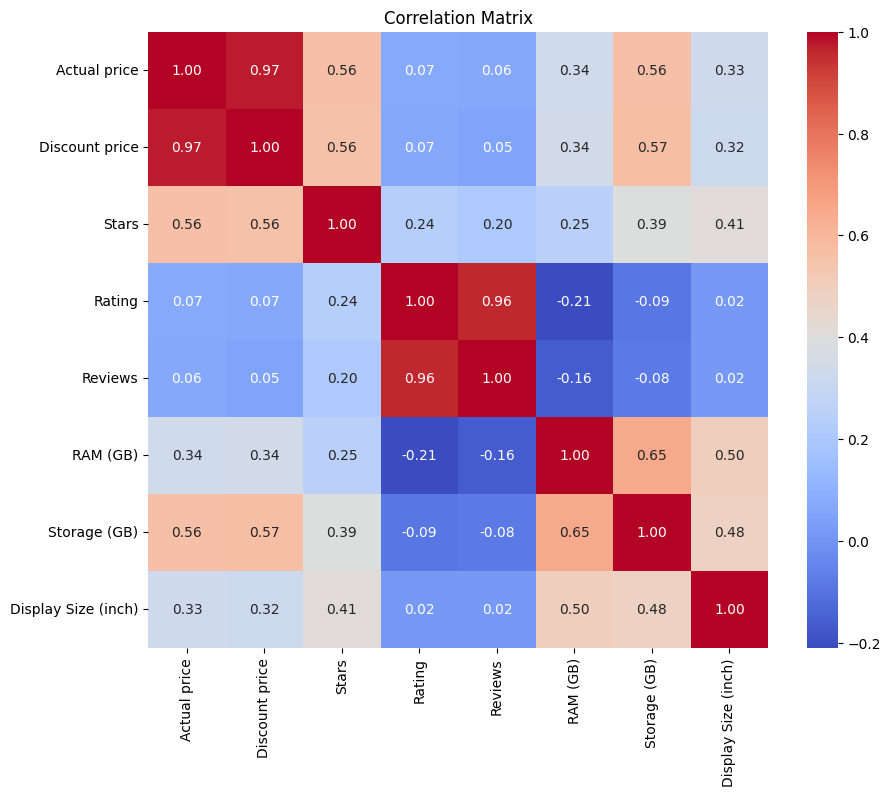

In [ ]:
#Tính chỉ số tương quan
corr = df[numerical_cols]. corr()

#plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

Summary about correlation matrix above:
- Actual price: Có sự tương quan (positive) mạnh với **Discount price**, có nghĩa rằng khi Actual price của sản phẩm tăng thì Discount price cũng tăng
- Rating: Có mối tương quan (positive) mạnh với **Reviews**, có thể hiểu rằng khi sản phẩm có rating cao thì số lượng reviews cũng tăng theo
- RAM (GB): có mối tương quan (positive) vừa phải với **Storage(GB)**, có thể hiểu rằng sản phẩm có RAM cao thì Storage cho sản phẩm đó cũng có xu hướng cao.
- Display Size (inch): có sự tương quan (positive) vừa phải với **RAM (GB)**, sản phẩm có màn hình hiển thị lớn thì RAM(GB) tăng.
- Mối tương quan vừa phải giữa **Display Size (inch)** và **Actual price**, cho thấy khi tăng kích cỡ hiển thị cho sản phẩm thì giá sản phẩm cũng có xu hướng tăng vừa phải
- Mối tương quan (positive) vừa phải giữa **Stars** và **Discount price**, có thể hiểu rằng khi stars rating tăng thì giá chiết khấu cũng tăng vừa phải

- Mối tương quan giữa (0.24) cho thấy mực độ tương quan giữa **Rating** và **Reviews** là tương đối thấp

- Gần như là không có mối tương quan giữa **Rating** và **Actual price**, cho thấy 2 biến này không có mối quan hệ tuyến tính (**Reviews** và **Actual price** cũng tương tự)



# 6. Feature Engineering

**Create new features based on the available data for further analysis**

**Brand**

In [ ]:
#Extracting Brand from Product Name
df['Brand'] = df['Product Name'].str.split(" ").str[0]
df['Brand'].replace('SAMSUNG', 'Samsung', inplace=True)

print(f"There are {len(df['Brand'].unique())} Brands")

There are 27 Brands


**Price Segment**: Divided Actual price into 5 bins

In [ ]:
bins = [0, 10000, 20000, 30000, 40000, df['Actual price'].max()]
labels = ['Low', 'Mid', 'High', 'Premium', 'Luxury']
df['Price Segment'] = pd.cut(df['Actual price'], bins=bins, labels=labels)


**Rating Band**: Divided 'Stars' in to 4 criterias

In [ ]:
bins = [0,2,3,4,5]
labels = ['Poor', 'Fair', 'Good', 'Excellent']
df['Rating band'] = pd.cut(df['Stars'], bins=bins, labels=labels)

In [ ]:
df.head()

,Product Name,Actual price,Discount price,Discount percentage,Stars,Rating,Reviews,RAM (GB),Storage (GB),Display Size (inch),Camera,Description,Brand,Price Segment,Rating band
0,"Apple iPhone 15 (Green, 128 GB)",79600,65999,17.086683,4.6,44793,2402,0.0,128.0,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,Apple,Luxury,Excellent
1,"Apple iPhone 15 (Blue, 128 GB)",79600,65999,17.086683,4.6,44793,2402,0.0,128.0,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,Apple,Luxury,Excellent
2,"Apple iPhone 15 (Black, 128 GB)",79600,65999,17.086683,4.6,44793,2402,0.0,128.0,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,Apple,Luxury,Excellent
3,"OnePlus N20 SE (JADE WAVE, 128 GB)",19999,11489,42.552128,4.0,1005,41,4.0,128.0,6.56,50MP,4 GB RAM | 128 GB ROM16.66 cm (6.56 inch) Disp...,OnePlus,Mid,Good
4,"OnePlus N20 SE (BLUE OASIS, 64 GB)",16999,12999,23.530796,4.0,1005,41,4.0,64.0,6.56,50MP,4 GB RAM | 64 GB ROM16.66 cm (6.56 inch) Displ...,OnePlus,Mid,Good


**Comparision distribution between "Actual price" and "Discount percentage"**

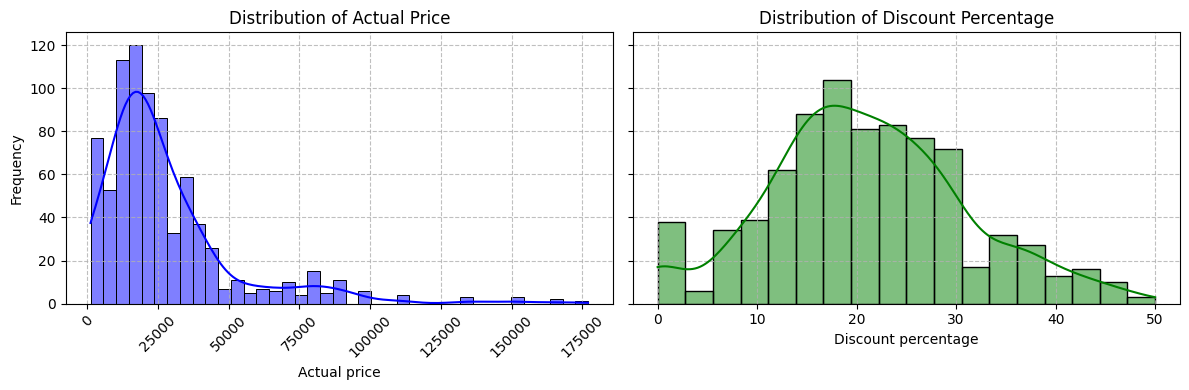

In [ ]:
#create subplot side by side
fig, axes = plt.subplots(1, 2, figsize=(12,4), sharey=True)


#plot distribution of "Actual price"
sns.histplot(data=df, x='Actual price',
             kde=True,
             color='blue',
             edgecolor='black',
             ax=axes[0]
)
axes[0].set_title("Distribution of Actual Price")
axes[0].set_ylabel("Frequency")
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, linestyle='--', alpha=0.8)




#plot distribution of "Discount percentage"
sns.histplot(data=df, x='Discount percentage',
             kde=True,
             color='green',
             edgecolor='black',
             ax=axes[1]
)
axes[1].set_title("Distribution of Discount Percentage")
axes[1].set_ylabel("Frequency")
axes[1].grid(True, linestyle='--', alpha=0.8)


#fixing layout
plt.tight_layout()
plt.show()

Distribution of Actual Price (Left)
- Phân bố lệch phải đáng kể
- Phân khúc dưới 25.000 chiếm phần lớn trong tổng số sản phẩm mobile phones
- Ở phân khúc giá càng cao, số lượng sản phẩm cũng giảm theo

Distribution of Discount Percentage (Right)
- Phân phối tương đối chuẩn, lệch nhẹ
- Mức Discount Percentage phổ biến nhất giao từ 15-25%
- Một số sản phẩm có % Discount rất thấp (xấp xỉ 0%), ngược lại một số sản phẩm % Discount rất cao (>50%)

**Comparison of Actual price and Discount price by Brand**

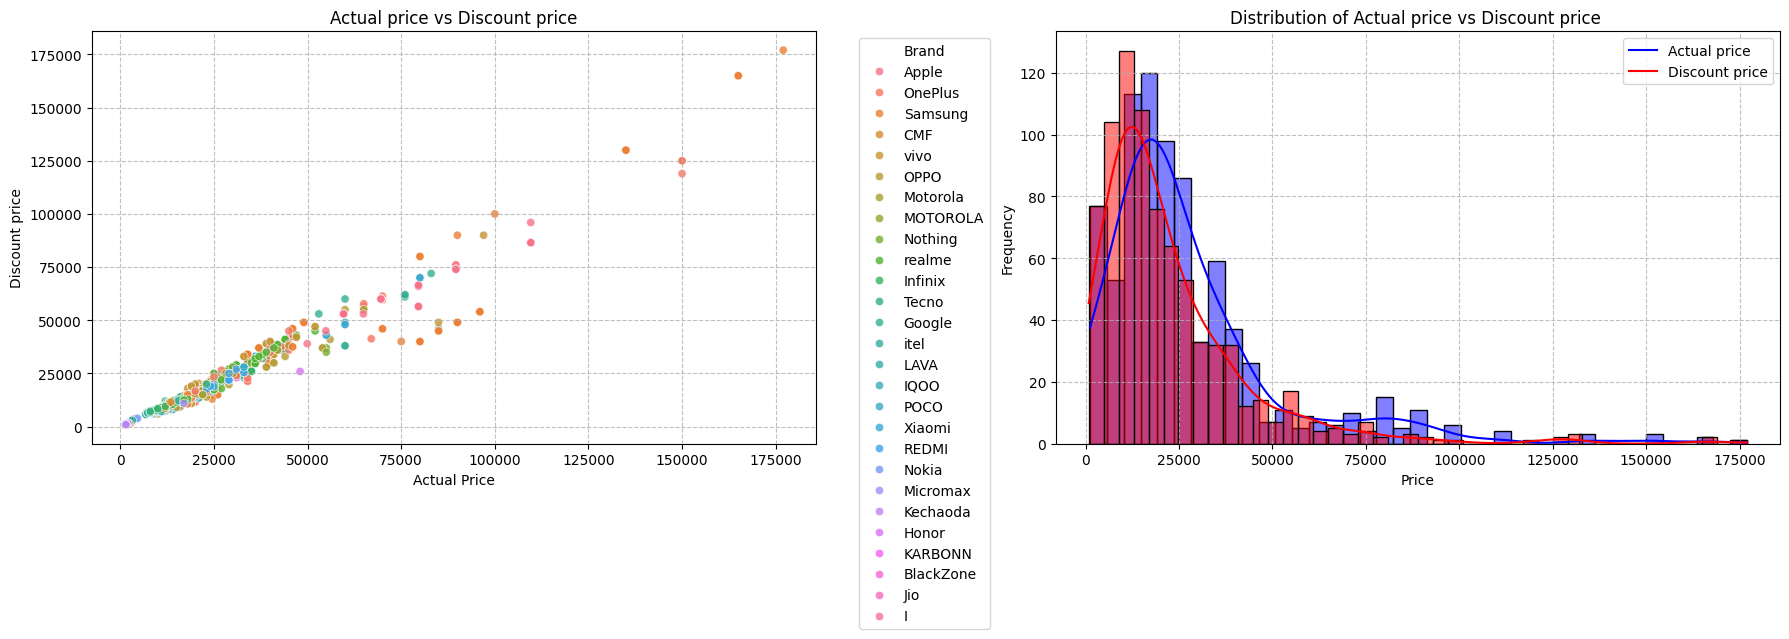

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))

#plot scatter with 'Actual price' and 'discount price'
sns.scatterplot(df, x='Actual price', y='Discount price', hue='Brand',
            alpha=0.8,
            ax=axes[0])
axes[0].set_title("Actual price vs Discount price")
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Discount price')
axes[0].legend(title = 'Brand', bbox_to_anchor=(1.05, 1) ,loc='upper left')
axes[0].grid(True, linestyle='--', alpha=0.8)


#distribution of Actual price vs Discount price
sns.histplot(df, x='Actual price', kde=True, color='blue', ax=axes[1])
sns.histplot(df, x='Discount price', kde=True, color='red', ax=axes[1])
axes[1].set_title("Distribution of Actual price vs Discount price ")
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Frequency')
axes[1].legend(['Actual price', 'Discount price'])
axes[1].grid(True, linestyle='--', alpha=0.8)



#fix layout
plt.tight_layout()
plt.show()


**Actual price vs. Discount Price by Brand** (Left)
- Theo quan sát, có mối tương quan mạnh mẽ giữa 2 giá trị **Actual price** và **Discount price** ở các Brand khác nhau. Giá sản phẩm tăng, giá chiết khấu có xu hướng tăng theo, điều này cho thấy chiến lược định giá chiết khấu có phụ thuộc vào giá thành sản phẩm
- Các điểm có màu sắc khác nhau đại diện cho từng Brand. Mức độ phân tán cho thấy sự khác biệt chiến lược định giá chiết khấu giữa các thương hiệu (ví dụ: Apple, SamSung có giá bán và giá chiết khấu cao hơn các Brand còn lại)


**Distribution of Actual price and Discount price**
- Actual price: sự phân bố lệch phải, với phần lớn số lượng sản phẩm có giá dưới mức 50.000 và chỉ có một số ít sản phẩm ở phân khúc premium và luxury
- Discount price: ta thấy sự phân bố lệch phải cũng tượng tự với giá thực tế. Điều này cho thấy rằng mặc dù áp dụng giảm giá nhưng chúng không làm giảm đáng kể giá sản phẩm mà duy trì mối quan hệ tỷ lệ thuận với giá thực tế.


**Average Discount Percentage by Brand**

In [ ]:
#using group by to find Average Discount Percentage by Brand
avg_pct_brand = df.groupby('Brand')['Discount percentage'].mean().sort_values(ascending=False)
avg_pct_brand

,Discount percentage
Brand,
I,38.612871
Honor,35.878281
Micromax,35.701287
KARBONN,29.888268
Kechaoda,28.960557
BlackZone,28.649386
POCO,25.827594
MOTOROLA,25.332883
REDMI,24.779412


- **I** là một thương hiệu có % chiết khấu trung bình cao nhất, có thể thấy rằng mục tiêu của thương hiệu là tập trung vào việc thu hút những khác hàng nhạy cảm về giá.
- Thương hiệu **Honor** và **Micromax** có mức % chiết khấu trung bình cao và khá cạnh tranh. Có thể mục đích của họ là nhắm vào phân khúc thị trường cụ thể nào đó.
- **Apple** và **Oneplus**: có mức % chiết khấu trung bình thấp, có khả năng là họ tập trung vào các sản phẩm ở phân khúc premium và luxury

**Price Segment Distribution**  ----- **Distribution of Actual price vs Price Category**

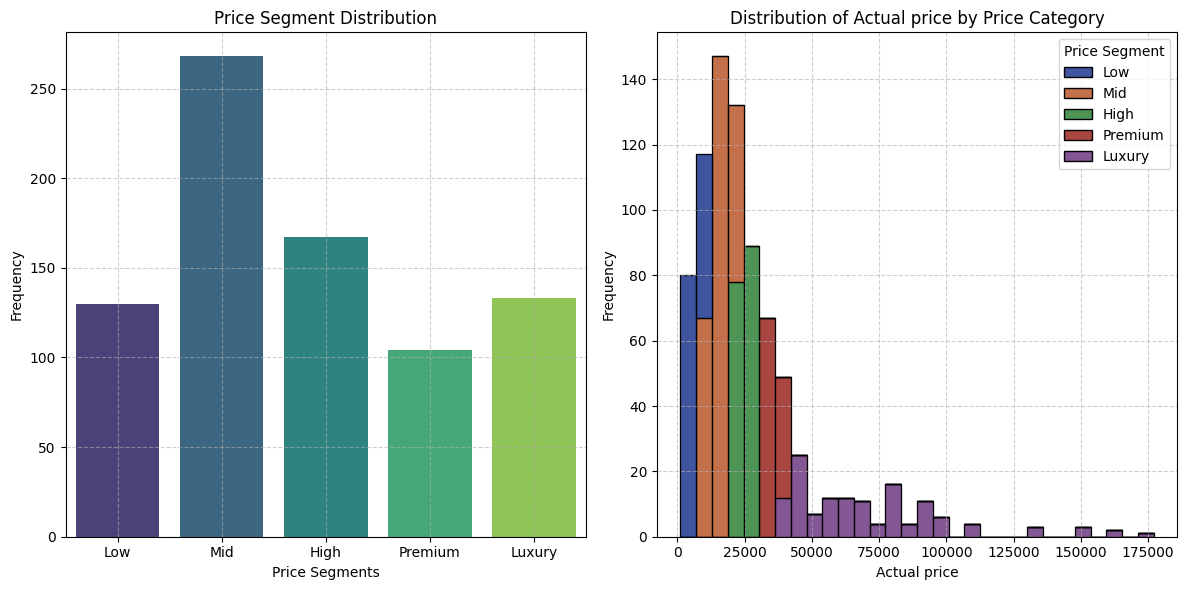

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(12,6))

#Price Segment Distribution
sns.countplot(df, x='Price Segment', ax=axes[0], palette='viridis')
axes[0].set_title("Price Segment Distribution")
axes[0].set_xlabel("Price Segments")
axes[0].set_ylabel("Frequency")
axes[0].grid(True, linestyle='--', alpha=0.6)


#Distribution of Actual price vs Price Category
sns.histplot(df, x='Actual price', hue='Price Segment', bins=30, multiple='stack', palette='dark', ax=axes[1])
axes[1].set_title("Distribution of Actual price by Price Category")
axes[1].set_xlabel("Actual price")
axes[1].set_ylabel("Frequency")
axes[1].grid(True, linestyle='--', alpha=0.6)

#adjust layout
plt.tight_layout()
plt.show()

  - Hầu hết các sản phẩm tập trung ở phân khúc **Low** và **Mid**. Điều này cho thấy, các công ty vừa và nhỏ tập trung vào mức giá mà khách hàng mục tiêu của họ có thể chi trả được

**Average Discount Percentage per Price Segment by Brand**

In [ ]:
avg_pct_seg_brand = df.groupby(['Brand', 'Price Segment'], as_index=False)['Discount percentage'].mean()
pivot = avg_pct_seg_brand.pivot(columns='Brand', index='Price Segment', values='Discount percentage')
pivot

Brand,Apple,BlackZone,CMF,Google,Honor,I,IQOO,Infinix,Jio,KARBONN,...,OPPO,OnePlus,POCO,REDMI,Samsung,Tecno,Xiaomi,itel,realme,vivo
Price Segment,,,,,,,,,,,,,,,,,,,,,
Low,NaN,28.649386,NaN,NaN,NaN,38.612871,NaN,18.897503,0.257216,29.888268,...,NaN,NaN,23.780353,28.436177,NaN,13.994919,NaN,19.029771,20.383880,NaN
Mid,NaN,NaN,20.001000,NaN,NaN,NaN,23.383700,19.764419,NaN,NaN,...,26.649988,22.796435,29.599170,29.364791,25.054151,24.170145,NaN,33.257539,21.175397,24.784581
High,NaN,NaN,18.182645,NaN,NaN,NaN,20.292799,19.886449,NaN,NaN,...,21.546740,11.066382,25.239931,20.454945,25.516226,16.509735,NaN,NaN,18.797004,18.535952
Premium,NaN,NaN,NaN,NaN,25.820188,NaN,NaN,25.105360,NaN,NaN,...,14.568479,19.260632,18.774057,15.349021,8.804360,NaN,NaN,NaN,13.150187,10.587053
Luxury,17.194288,NaN,NaN,19.542158,45.936374,NaN,6.666815,NaN,NaN,NaN,...,24.037514,14.427104,NaN,NaN,22.992676,NaN,18.138825,NaN,8.947735,15.553562


1. Big Brands
  - Apple, Google tập trung chủ yếu ở phân khúc cao cấp (luxury) với mức chiết khấu trung bình (<20%). Trong khi đó, Samsung tập mở rộng nhiều phân khúc (4 segments) khác nhau với mức chiết khấu cao nhất ở phân khúc middle và high (>25%).
2. Small and Medium Brands
  - Xiaomi và Honor tập trung ở phân khúc cao cấp (Premium và Luxury). Mức chiếc khấu cho phân khúc luxury của Hornor (46%) cao hơn gấp đôi so với Xiaomi (18%).
  - Nhìn chung, các thương hiệu vừa và nhỏ tập trung đa dạng ở các phân khúc với mức chiếc khấu cao với mục tiêu có được tệp khách hàng đa dạng trải dài ở nhiều phân khúc khác nhau.


### **Business insights**

- Discount Patterns:
  - Phân khúc giá Low và Middle có mức chiết khấu cao hơn cho thấy rằng phân khúc này được nhắm đến để tăng doanh số bán hàng với số lượng lớn hoặc giải quyết vấn đề đồn kho phần.
  - Ở các phân khúc còn lại bao gồm High, Premium và Luxury có mức chiết khấu thấp hơn, cho thấy chiến lược ở phân khúc này là nhằm duy trì mức giá cao và tính độc quyền của thương hiệu.

- Brand Performance:
  - Một số thương hiệu như I, Honor, Micromax có mức chiết khấu trung bình cao nhất, điều này cho thấy chiến lược của họ là thu hút tệp khách hàng nhạy cảm về giá.
  - Một số thương hiệu như Apple, Oneplus có mức chiết khấu trung bình thấp nhất, điều này cho thấy chiến lược định vị thương hiệu của họ là ở mức giá cao (high-value pricing)
  - Một số công ty thực hiện đa dạng chiến lược chiết khấu ở nhiều phân khúc với mục tiêu tiếp cận rộng rãi hơn và tối ưu hóa doanh thu từ nhiều nhóm khách hàng khác nhau.

### **Recommendations**
- Thương hiệu (Brand):
  - Theo giõi mức chiết khấu của đối thủ cạnh tranh, đặc biệt là ở phân khúc Low và Middle nhằm mục đích duy trì tính cạnh tranh về mặt thị phần.
  - Ở các thương hiệu lớn với mức chiếc khấu thấp như Apple. Lập kết hoạch cho các chương trình khuyến mãi có thời hạn nhằm kích thích nhu cầu.
- Bán lẻ (Retailers):
  - Tối ưu hóa chiến lược chiết khấu: Xem xét tăng mức chiết khấu cho các phân khúc Low và Middle nhằm mục đích gia tăng doanh thu. Bên cạnh đó thực hiện các chương trình khuyến mãi để thu hút thêm khách hàng cho phân khúc này
  - Duy trì mức chiết khấu thấp cho sản phẩm ở phân khúc giá cao nhằm thúc đẩy tính độc quyền của thương hiệu

